### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 



#### Using the dataset given need to categorise the countries using some socio-economic and health factors that determine the overall development of the country and then need to suggest CEO of HELP international NGO  which are the countries that are in the direst need of aid. 


In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#to perform Heirarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



In [2]:
#importing the dataset-country
data=pd.read_csv("C://Users//mohit//Downloads//Mohit Data Science//PCA+Clustering assignment//Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check the count of countries
data.country.value_counts()

Austria                   1
Pakistan                  1
Ecuador                   1
Luxembourg                1
Tajikistan                1
Indonesia                 1
Australia                 1
Belarus                   1
Timor-Leste               1
Comoros                   1
Eritrea                   1
Iran                      1
Guyana                    1
Romania                   1
Morocco                   1
Senegal                   1
Liberia                   1
Netherlands               1
Zambia                    1
South Africa              1
Gabon                     1
Cameroon                  1
Kazakhstan                1
Bosnia and Herzegovina    1
Brunei                    1
France                    1
Namibia                   1
Albania                   1
Portugal                  1
Burundi                   1
                         ..
Samoa                     1
Sri Lanka                 1
United Kingdom            1
Philippines               1
Moldova             

In [4]:
# Now, we need to create a ID columns, without this we will not be able to make necessary conclusions or we will not be able to
# identify that which observation goes to which cluster
data['ID'] = data.index+100

In [5]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [6]:
country=data[['country','ID']]   #To use lateron 
country.head()

,country,ID
0,Afghanistan,100
1,Albania,101
2,Algeria,102
3,Angola,103
4,Antigua and Barbuda,104


In [7]:
## Let's drop countries column as this is a label column and we don't need it in case of unsupervised learning models
data.drop('country', axis = 1, inplace = True)


In [8]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [9]:
#Treating the data as he following columns are given in percentage so getting back the real number 

data['exports']=(data['exports']*data['gdpp'])/100
data['health']=(data['health']*data['gdpp'])/100
data['imports']=(data['imports']*data['gdpp'])/100

#### The ID column will be useful while performing cluster profiling, I wanted to know which country goes into which cluster


In [10]:
# Also, check the info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
ID            167 non-null int64
dtypes: float64(7), int64(3)
memory usage: 13.1 KB


In [11]:
#not seeing any null values 
# Number of nulls per column
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ID            0
dtype: int64

### Check for Outliers

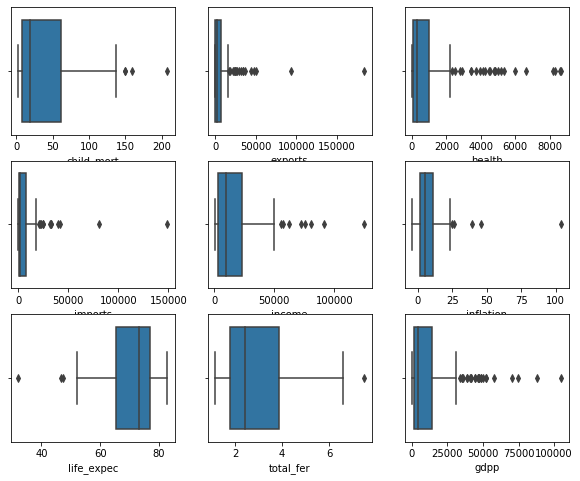

In [12]:
# Check outliers
plt.figure(figsize = (10,8))
var = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = data)

In [13]:
#We can see the presence of outliers 
#We would be doing the soft treatment individually to these columns

In [14]:
#Treating Outlier

q1 = data['gdpp'].quantile(0.02)
q4 = data['gdpp'].quantile(0.98)
data = data[(data['gdpp']>=q1) & (data['gdpp']<=q4)]
data.shape

(159, 10)

In [15]:
q1 = data['child_mort'].quantile(0.01)
q4 = data['child_mort'].quantile(0.99)
data = data[(data['child_mort']>=q1) & (data['child_mort']<=q4)]
data.shape

(155, 10)

In [16]:
q1 = data['exports'].quantile(0.01)
q4 = data['exports'].quantile(0.99)
data = data[(data['exports']>=q1) & (data['exports']<=q4)]
data.shape

(151, 10)

In [17]:
q1 = data['income'].quantile(0.01)
q4 = data['income'].quantile(0.99)
data = data[(data['income']>=q1) & (data['income']<=q4)]
data.shape

(147, 10)

In [18]:
q1 = data['inflation'].quantile(0.01)
q4 = data['inflation'].quantile(0.99)
data = data[(data['inflation']>=q1) & (data['inflation']<=q4)]
data.shape

(143, 10)

In [19]:
q1 = data['health'].quantile(0.02)
q4 = data['health'].quantile(0.98)
data = data[(data['health']>=q1) & (data['health']<=q4)]
data.shape

(137, 10)

In [20]:
q1 = data['imports'].quantile(0.01)
q4 = data['imports'].quantile(0.99)
data = data[(data['imports']>=q1) & (data['imports']<=q4)]
data.shape

(133, 10)

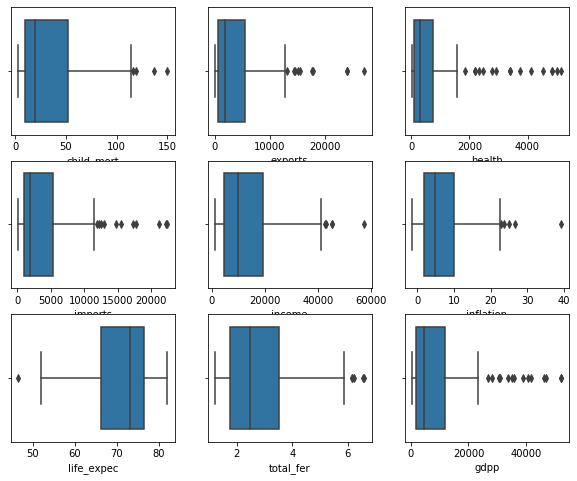

In [21]:
## we are done with soft treaing and now let's check for outliers again
plt.figure(figsize = (10,8))
var = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = data)

In [22]:
#We can still see outliers but we can't afford to lose more data so let's proceed further with the data

### Let's proceed with analysis part 

In [23]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
ID = data['ID']

In [24]:
# Now let's drop the ID column as it is not a predictor in our data.
data1 = data.drop('ID', axis =1)

In [25]:
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [26]:
data1.shape

(133, 9)

### Scaling the data

In [27]:
## Let's scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2 =scaler.fit_transform(data1)

In [28]:
data2

array([[ 1.62391717, -0.75153511, -0.61681292, ..., -1.91705925,
         2.08870108, -0.76559826],
       [-0.53275728, -0.54698122, -0.41810147, ...,  0.71837965,
        -0.85959371, -0.46400409],
       [-0.21921901, -0.44048332, -0.49013096, ...,  0.74460292,
         0.01711745, -0.4324548 ],
       ...,
       [-0.33642958, -0.58489285, -0.57488012, ...,  0.29880729,
        -0.64748617, -0.70105011],
       [ 0.63055761, -0.68815512, -0.59400228, ..., -0.43544434,
         1.27562218, -0.70105011],
       [ 1.41586841, -0.66052843, -0.57805454, ..., -2.46774797,
         1.79175053, -0.68825986]])

### Now we will be performing Principal Component Analysis on the data


In [29]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(data2)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[-0.30360325,  0.3636603 ,  0.35730704,  0.37864634,  0.37821121,
        -0.15863558,  0.32676576, -0.28860364,  0.38243692],
       [ 0.50955293,  0.30553274,  0.23900799,  0.24851053,  0.1679578 ,
         0.14813858, -0.37422776,  0.52276792,  0.25423546],
       [-0.15394414,  0.08121288, -0.12289881, -0.02722106,  0.20027926,
         0.94557615,  0.12359691, -0.06373637, -0.01720467],
       [-0.02812984,  0.43686035, -0.6015987 ,  0.32406503,  0.18151683,
        -0.12297249, -0.37441381, -0.25333018, -0.29831213],
       [-0.05224759, -0.16421047,  0.36624199, -0.09212745, -0.0795774 ,
         0.12263604, -0.68677422, -0.55572243,  0.16070482],
       [ 0.32188632, -0.20644314, -0.16522241, -0.44946228,  0.7559324 ,
        -0.13570131,  0.02837161, -0.14374399,  0.11462859],
       [-0.71774272, -0.09677944, -0.04850928, -0.14398899,  0.25985326,
        -0.09293258, -0.35373299,  0.49314204,  0.08897679],
       [ 0.0430307 , -0.56083792, -0.41079597,  0.49128949, -0

In [31]:
#variance explained by the first principal component
pca.explained_variance_ratio_

array([0.65512078, 0.16167786, 0.10053565, 0.03578494, 0.02274548,
       0.01174134, 0.00981045, 0.00158197, 0.00100154])

Text(0, 0.5, 'Cumulative Variance')

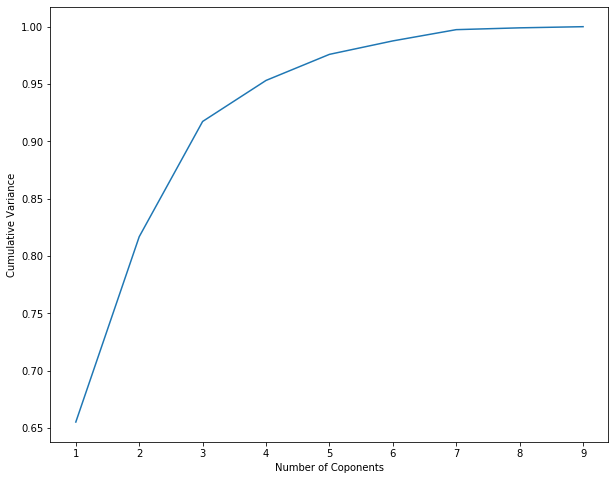

In [32]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5,6,7,8,9],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

In [33]:
###Choosing the number of components as 3 as cummulative variance is above 90% at 3
### Running the PCA with the components choosed above

#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 3)


In [34]:
# Transform the data here
df_pca = pca_final.fit_transform(data2)
df_pca.shape

(133, 3)

In [35]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'ID': list(ID), 'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2]})

In [36]:
pca_df2.head()

,ID,PC1,PC2,PC3
0,100,-3.239991,1.745366,-0.475690
1,101,-0.107823,-1.594359,-0.183798
2,102,-0.638465,-0.708610,1.340618
3,103,-3.197035,2.706425,1.264801
4,104,1.343420,-0.679847,-0.455187


In [37]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
#Let's check the Hopkins measure
hopkins(pca_df2.drop('ID', axis=1))

0.7886931592900852

### Given data is good for clustering as given data's hopkins statistics is above 80%

In [39]:
# Now for performing clustering, we need to again drop the ID column, Let's drop it
data3 = pca_df2.drop('ID', axis = 1)


In [40]:
data3.head()

,PC1,PC2,PC3
0,-3.239991,1.745366,-0.475690
1,-0.107823,-1.594359,-0.183798
2,-0.638465,-0.708610,1.340618
3,-3.197035,2.706425,1.264801
4,1.343420,-0.679847,-0.455187


## K- means Clustering


In [41]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data3)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5227728252938559
For n_clusters=3, the silhouette score is 0.4604418318060978
For n_clusters=4, the silhouette score is 0.4180539472645311
For n_clusters=5, the silhouette score is 0.43502814852270744
For n_clusters=6, the silhouette score is 0.3605561332766533
For n_clusters=7, the silhouette score is 0.3860538774987657
For n_clusters=8, the silhouette score is 0.37828301256679303


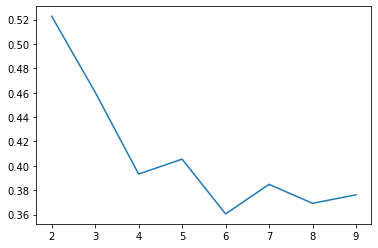

In [42]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data3)
    ss.append([k, silhouette_score(data3, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [43]:
# here we can see a bend at 3 so we can choose optimal cluster as 3 

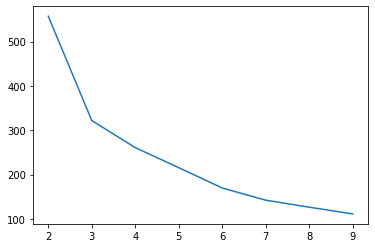

In [44]:
#Now let's proceed to the elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data3)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

### after using both methods i.e. silhourtte and elbow curve method we can choose K as 3

### Now KMeans with the K that  we have choosed

In [45]:
#Let's perform K means using K=3
model_kmean = KMeans(n_clusters = 3, random_state = 50)
model_kmean.fit(data3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [46]:
pca_df2.columns

Index(['ID', 'PC1', 'PC2', 'PC3'], dtype='object')

In [47]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['ID', 'PC1', 'PC2','PC3', 'ClusterID']
dat_km.head()

,ID,PC1,PC2,PC3,ClusterID
0,100,-3.239991,1.745366,-0.475690,0
1,101,-0.107823,-1.594359,-0.183798,1
2,102,-0.638465,-0.708610,1.340618,1
3,103,-3.197035,2.706425,1.264801,0
4,104,1.343420,-0.679847,-0.455187,1


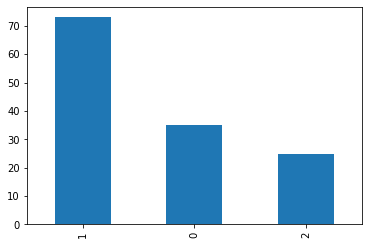

In [48]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


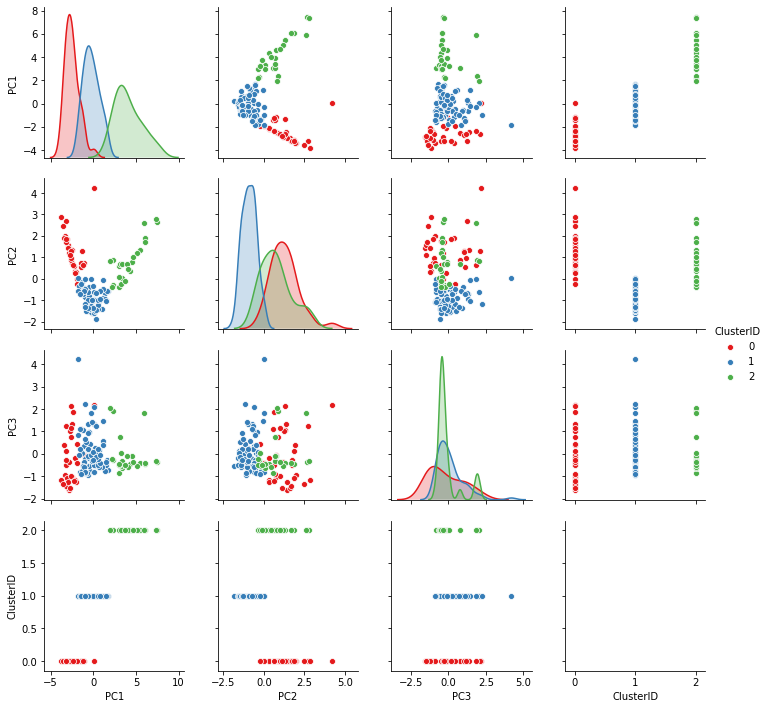

In [49]:
# Plot the Cluster with respect to the clusters obtained
sns.pairplot(dat_km[['PC1','PC2','PC3','ClusterID']], hue = 'ClusterID', palette='Set1')

## Cluster Profiling

In [50]:
# Let's merge the original data with the data(ClusterID)
data5 = pd.merge(data, dat_km[['ID', 'ClusterID']], on = 'ID')

In [51]:
data5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,1


In [52]:
## Analysis of the clusters
data5.drop(['ID','exports','health','imports','inflation','life_expec','total_fer'], axis =1).groupby('ClusterID').mean()

,child_mort,income,gdpp
ClusterID,,,
0,83.320000,4775.714286,2397.914286
1,21.430137,11344.109589,5787.506849
2,5.812000,34844.000000,30452.000000


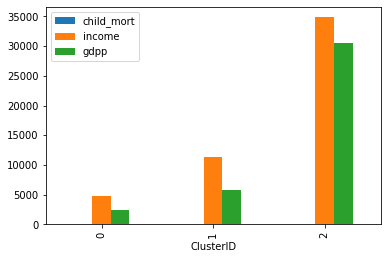

In [53]:
data5[['child_mort', 'income', 'gdpp','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

In [54]:
## We can say that  the countries which are cluster 0 has less income and gdpp whereas it's highest in cluster2

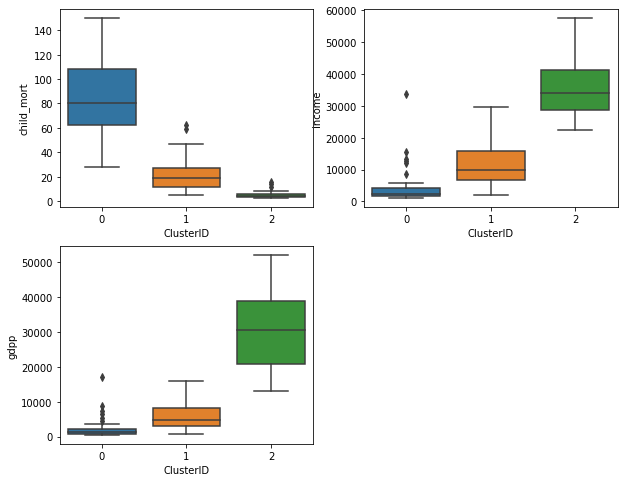

In [55]:
# Check outliers
plt.figure(figsize = (10,8))
var = ['child_mort', 'income', 'gdpp']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = data5)

## We can say the following about each cluster wrt to other clusters:

### Cluster 0 : Highest Child mortality , lowest income and lowest gdpp
### Cluser  1:  medium child mortality , midium income and midium gdpp
### Cluster 2:  Lowest child mortality , highest income and highest gdpp.    

In [56]:
# We need to find atleas 5 countries which are in direst need of aid 
# Those countries can be found from cluster 0 , let's form new dataframe for cluster 0

In [57]:
kmeans_cluster=data5.ClusterID==0

k_2=data5[kmeans_cluster]
k_3=k_2[['child_mort','income','gdpp','ID','ClusterID']]
k_3.head()

,child_mort,income,gdpp,ID,ClusterID
0,90.2,1610,553,100,0
3,119.0,5900,3530,103,0
15,111.0,1820,758,117,0
19,52.5,13300,6350,121,0
22,116.0,1430,575,125,0


In [58]:
k_3.shape

(35, 5)

In [59]:
# Now to find 5 countries out of the 35 we can check for countries with highest child mort , lowest income and lowest gdpp.
#let's do the sorting part for each columns 

In [60]:
k_cm=k_3.sort_values("child_mort",ascending=False) # Datase wrt to child mort in descending order 
k_cm[['child_mort','ID','ClusterID']].head(10)

,child_mort,ID,ClusterID
26,150.0,132,0
79,137.0,197,0
3,119.0,103,0
22,116.0,125,0
55,114.0,164,0
15,111.0,117,0
33,111.0,140,0
41,111.0,149,0
54,109.0,163,0
24,108.0,128,0


In [61]:
k_income=k_3.sort_values("income",ascending=True) # Datase wrt to income in ascending order
k_income[['income','ID','ClusterID']].head(10)

,income,ID,ClusterID
54,1190,163,0
118,1210,250,0
55,1390,164,0
30,1410,136,0
22,1430,125,0
123,1540,255,0
0,1610,100,0
47,1660,156,0
68,1730,181,0
105,1780,236,0


In [62]:
k_gdpp=k_3.sort_values("gdpp",ascending=True) # # Datase wrt to gdpp in ascending order
k_gdpp[['gdpp','ID','ClusterID']].head(10)

,gdpp,ID,ClusterID
118,488,250,0
55,547,164,0
0,553,100,0
47,562,156,0
22,575,125,0
123,595,255,0
54,648,163,0
115,702,247,0
79,708,197,0
114,738,246,0


In [63]:
k_final1 = pd.merge(k_income,country[['ID', 'country',]], on = 'ID') #merging country datset 

In [64]:
k_final2 = pd.merge(k_gdpp,country[['ID', 'country',]], on = 'ID')

In [65]:
k_final3 = pd.merge(k_cm,country[['ID', 'country',]], on = 'ID')

In [66]:
k_final1.head(15)

,child_mort,income,gdpp,ID,ClusterID,country
0,109.0,1190,648,163,0,Guinea
1,90.3,1210,488,250,0,Togo
2,114.0,1390,547,164,0,Guinea-Bissau
3,88.2,1410,769,136,0,Comoros
4,116.0,1430,575,125,0,Burkina Faso
5,81.0,1540,595,255,0,Uganda
6,90.2,1610,553,100,0,Afghanistan
7,80.3,1660,562,156,0,Gambia
8,62.7,1730,1490,181,0,Kiribati
9,28.1,1780,1290,236,0,Solomon Islands


In [67]:
k_final2.head(15)

,child_mort,income,gdpp,ID,ClusterID,country
0,90.3,1210,488,250,0,Togo
1,114.0,1390,547,164,0,Guinea-Bissau
2,90.2,1610,553,100,0,Afghanistan
3,80.3,1660,562,156,0,Gambia
4,116.0,1430,575,125,0,Burkina Faso
5,81.0,1540,595,255,0,Uganda
6,109.0,1190,648,163,0,Guinea
7,71.9,2090,702,247,0,Tanzania
8,137.0,1870,708,197,0,Mali
9,52.4,2110,738,246,0,Tajikistan


In [68]:
k_final3.head(15)

,child_mort,income,gdpp,ID,ClusterID,country
0,150.0,1930,897,132,0,Chad
1,137.0,1870,708,197,0,Mali
2,119.0,5900,3530,103,0,Angola
3,116.0,1430,575,125,0,Burkina Faso
4,114.0,1390,547,164,0,Guinea-Bissau
5,111.0,1820,758,117,0,Benin
6,111.0,2690,1220,140,0,Cote d'Ivoire
7,111.0,33700,17100,149,0,Equatorial Guinea
8,109.0,1190,648,163,0,Guinea
9,108.0,2660,1310,128,0,Cameroon


## on checking the data on the basis of gdpp , income and child mortality using kmeans we can say that 5 countries which are in which are in direst need of aid are:
### Guninew-Bissau , Burkina Faso , Guinea , Togo and Afghanisthan

In [69]:
##Now let's do the same using Hirearchieal clustering
## Hirearchieal Clustering + Profiling

In [70]:
data3.head()

,PC1,PC2,PC3
0,-3.239991,1.745366,-0.475690
1,-0.107823,-1.594359,-0.183798
2,-0.638465,-0.708610,1.340618
3,-3.197035,2.706425,1.264801
4,1.343420,-0.679847,-0.455187


In [71]:
data5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,1


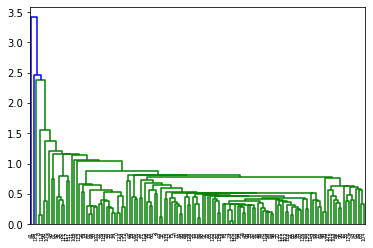

In [72]:
# single linkage
mergings = linkage(data3, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

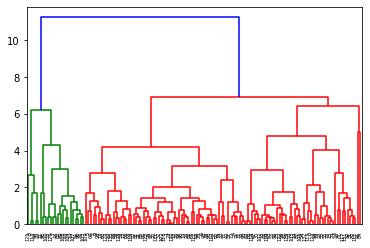

In [73]:
# complete linkage
mergings = linkage(data3, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [74]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0,
       2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0,
       0])

In [75]:
# assign cluster labels
data5['cluster_labels'] = cluster_labels
data5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,100,0,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,101,1,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,102,1,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,103,0,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,104,1,1


In [76]:
## Analysis of the clusters
data5.drop(['ID','exports','health','imports','inflation','life_expec','total_fer','ClusterID'], axis =1).groupby('cluster_labels').mean()

,child_mort,income,gdpp
cluster_labels,,,
0,71.163043,5082.608696,2559.239130
1,19.025000,12601.093750,6506.093750
2,5.860870,35917.391304,31895.652174


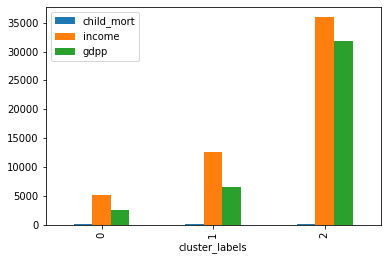

In [77]:
data5[['child_mort', 'income', 'gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [78]:
## We can say that  the countries which are cluster 0 has less income and gdpp whereas it's highest in cluster2

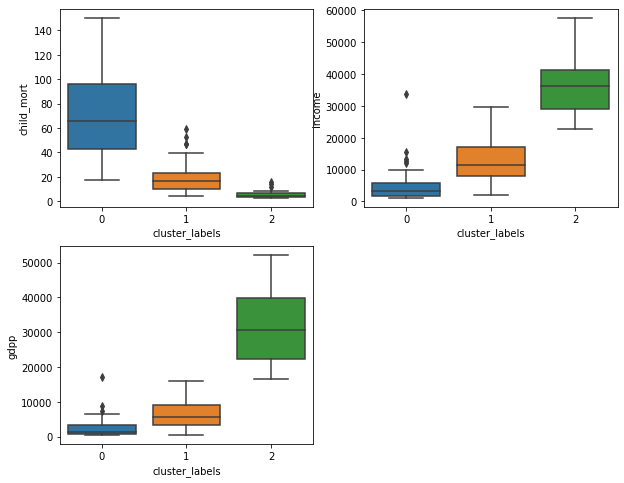

In [79]:
# Check outliers
plt.figure(figsize = (10,8))
var = ['child_mort', 'income', 'gdpp']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_labels', y = i[1], data = data5)

## We can say the following about each cluster wrt to other clusters:
### Cluster 0 : Highest Child mortality , lowest income and lowest gdpp
### Cluser 1: medium child mortality , midium income and midium gdpp
### Cluster 2: Lowest child mortality , highest income and highest gdpp.


In [80]:
# We need to find atleas 5 countries which are in direst need of aid 
# Those countries can be found from cluster 0 , let's form new dataframe for cluster 0

In [81]:
h_cluster=data5.cluster_labels==0

h_2=data5[h_cluster]
h_3=h_2[['child_mort','income','gdpp','ID','cluster_labels']]
h_3.head()

,child_mort,income,gdpp,ID,cluster_labels
0,90.2,1610,553,100,0
3,119.0,5900,3530,103,0
15,111.0,1820,758,117,0
16,42.7,6420,2180,118,0
19,52.5,13300,6350,121,0


In [82]:
h_3.shape

(46, 5)

In [83]:
# Now to find 5 countries out of the 35 we can check for countries with highest child mort , lowest income and lowest gdpp.
#let's do the sorting part for each columns 

In [84]:
h_cm=h_3.sort_values("child_mort",ascending=False)
h_cm[['child_mort','ID','cluster_labels']].head(10)

,child_mort,ID,cluster_labels
26,150.0,132,0
79,137.0,197,0
3,119.0,103,0
22,116.0,125,0
55,114.0,164,0
15,111.0,117,0
33,111.0,140,0
41,111.0,149,0
54,109.0,163,0
24,108.0,128,0


In [85]:
h_income=h_3.sort_values("income",ascending=True)
h_income[['income','ID','cluster_labels']].head(10)

,income,ID,cluster_labels
54,1190,163,0
118,1210,250,0
55,1390,164,0
30,1410,136,0
22,1430,125,0
123,1540,255,0
0,1610,100,0
47,1660,156,0
68,1730,181,0
105,1780,236,0


In [86]:
h_gdpp=h_3.sort_values("gdpp",ascending=True)
h_gdpp[['gdpp','ID','cluster_labels']].head(10)

,gdpp,ID,cluster_labels
118,488,250,0
55,547,164,0
0,553,100,0
47,562,156,0
22,575,125,0
123,595,255,0
54,648,163,0
115,702,247,0
79,708,197,0
15,758,117,0


In [87]:
h_final1 = pd.merge(h_income,country[['ID', 'country',]], on = 'ID')

In [88]:
h_final2 = pd.merge(h_gdpp,country[['ID', 'country',]], on = 'ID')

In [89]:
h_final3 = pd.merge(h_cm,country[['ID', 'country',]], on = 'ID')

In [90]:
h_final1.head(15)

,child_mort,income,gdpp,ID,cluster_labels,country
0,109.0,1190,648,163,0,Guinea
1,90.3,1210,488,250,0,Togo
2,114.0,1390,547,164,0,Guinea-Bissau
3,88.2,1410,769,136,0,Comoros
4,116.0,1430,575,125,0,Burkina Faso
5,81.0,1540,595,255,0,Uganda
6,90.2,1610,553,100,0,Afghanistan
7,80.3,1660,562,156,0,Gambia
8,62.7,1730,1490,181,0,Kiribati
9,28.1,1780,1290,236,0,Solomon Islands


In [91]:
h_final2.head(15)

,child_mort,income,gdpp,ID,cluster_labels,country
0,90.3,1210,488,250,0,Togo
1,114.0,1390,547,164,0,Guinea-Bissau
2,90.2,1610,553,100,0,Afghanistan
3,80.3,1660,562,156,0,Gambia
4,116.0,1430,575,125,0,Burkina Faso
5,81.0,1540,595,255,0,Uganda
6,109.0,1190,648,163,0,Guinea
7,71.9,2090,702,247,0,Tanzania
8,137.0,1870,708,197,0,Mali
9,111.0,1820,758,117,0,Benin


In [92]:
h_final3.head(15)

,child_mort,income,gdpp,ID,cluster_labels,country
0,150.0,1930,897,132,0,Chad
1,137.0,1870,708,197,0,Mali
2,119.0,5900,3530,103,0,Angola
3,116.0,1430,575,125,0,Burkina Faso
4,114.0,1390,547,164,0,Guinea-Bissau
5,111.0,1820,758,117,0,Benin
6,111.0,2690,1220,140,0,Cote d'Ivoire
7,111.0,33700,17100,149,0,Equatorial Guinea
8,109.0,1190,648,163,0,Guinea
9,108.0,2660,1310,128,0,Cameroon


 ### on checking the data on the basis of gdpp , income and child mortality using Hirearchieal Clustering we can say that 5 countries which are in which are in direst need of aid are:
### Guninew-Bissau , Burkina Faso , Guinea , Togo and Afghanisthan
    